# Ceneo Analyzer

## Loading libraries

In [46]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Listing codes for all products for which opinions have been extracted

In [47]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

153373072
158793489


## Specifying opinions about which product are to be analyzed

In [48]:
# product_id = input("Please provide Ceneo.pl product code: ")
product_id = "153373072"
# product_id = "158793489"

## Importing opinions from JSON file to pandas.Dataframe

In [49]:
opinions = pd.read_json(f"opinions/{product_id}.json")
MAX_SCORE = 5
opinions.score = opinions.score.apply(lambda s: round(s*MAX_SCORE, 1))

## Basic statistics

In [50]:
opinions_count = opinions.index.size
pros_count = opinions.pros.apply(lambda p: None if not p else p).count()
cons_count = opinions.cons.apply(lambda c: None if not c else c).count()
avarage_score = opinions.score.mean()

## Basiic charts

### Score histogram

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '1'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '2'),
 Text(0, 0, '4'),
 Text(0, 0, '7'),
 Text(0, 0, '46')]

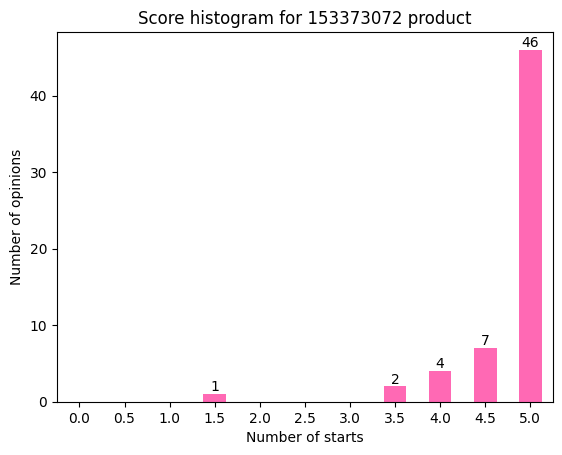

In [57]:
score_distribution = opinions.score.value_counts().reindex(np.arange(0,5.5,0.5), fill_value = 0)
fig, ax = plt.subplots()
score_distribution.plot.bar(color = "hotpink")
plt.xlabel("Number of starts")
plt.ylabel("Number of opinions")
plt.title(f"Score histogram for {product_id} product")
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], label_type = 'edge', fmt = lambda l: int(l) if l else "")

### Recommendations shares

Text(0.5, 1.0, 'Recommendations shares for 153373072 product')

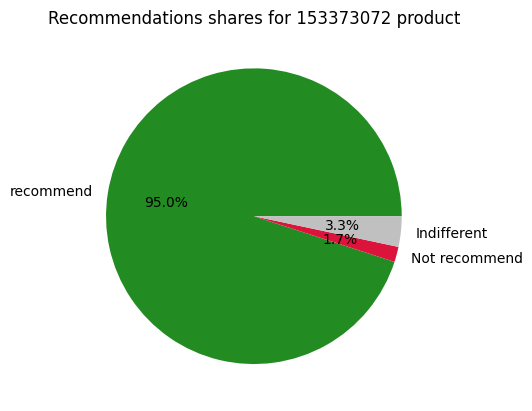

In [72]:
recommendation_distribution = opinions.recommendation.value_counts(dropna=False).reindex([True, False, np.nan], fill_value = 0)
recommendation_distribution
recommendation_distribution.plot.pie(
    labels = ["recommend", "Not recommend", "Indifferent"],
    label = "",
    colors = ["forestgreen", "crimson", "silver"],
    autopct = lambda l: "{:1.1f}%".format(l) if l else ""
)

plt.title(f"Recommendations shares for {product_id} product")